In [1]:
source("../Scripts/summarize_functions.r")
source("../Scripts/functions.R")
source("../Scripts/visulizations.r")
library(dplyr)
library(purrr)

library(ggplot2)
 library("RColorBrewer")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
celltypes = c('T cell','B cell','NK cell',  'Monocytes', 'Erythroid','Myelocytes','Dendritic cell',   'HSCs & MPPs',  'Lymphomyeloid prog',  'Megakaryocyte progenitors',
              'Erythro-myeloid progenitors','Plasma cells','Eosinophil-basophil-mast cell progenitors',
              'Mesenchymal cell')
methods <- c("Seurat", "SingleR","CellID", "SingleCellNet", "ItClust")  

sizes <- c(14707,9848,5438, 4081,4019,3060,2681,1908,1454,666,492,486,199,18)
names(sizes) <- celltypes

nb.cols <- 14
colors <- colorRampPalette(brewer.pal(8, "Set3"))(nb.cols)
names(colors) <- celltypes


In [5]:
umapdata <- read.csv("../Results/Files/umap_bonemarrow_data.csv") # umap data file
rownames(umapdata)<- umapdata$id
expressiondata_file="../Data/Fulldata/BoneMarrow_Query//data.csv" #  expression data
measures <- read.csv("../Results/Files//values_full_bonemarrow.csv") # results on the full data
meta <- read.csv("../Data/Fulldata/BoneMarrow_Query/meta.csv")


In [6]:
umapdata <- merge(umapdata, meta, by="id")
rownames(umapdata) <- umapdata$id
head(umapdata)
umap <- prepare_umap(file = expressiondata_file, meta_data = umapdata)


,id,reference,CellID,ItClust,Seurat,SingleCellNet,SingleR,ct,class_
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
X100105,X100105,BoneMarrow,1.0,1,1,1,1.0,Plasmacytoid dendritic cell progenitors,Dendritic cell
X100197,X100197,BoneMarrow,1.0,1,1,1,1.0,Mature naive B cells,B cell
X100262,X100262,BoneMarrow,1.0,0,1,1,1.0,CD8+CD103+ tissue resident memory T cells,T cell
X100267,X100267,BoneMarrow,1.0,1,1,1,1.0,Nonswitched memory B cells,B cell
X100405,X100405,BoneMarrow,0.5,0,1,1,0.8,CD8+ naive T cells,T cell
X100444,X100444,BoneMarrow,1.0,1,1,1,1.0,Lymphomyeloid prog,Lymphomyeloid prog


Warning message in data.table::fread(data, sep = ",", verbose = F):
“Detected 13165 column names but the data has 13166 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 500
[1] "Scaling..."
[1] "create seurat object...."
[1] "Set assay...."
[1] "PCA...."
[1] "Get UMAP..."


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


[1] "...."


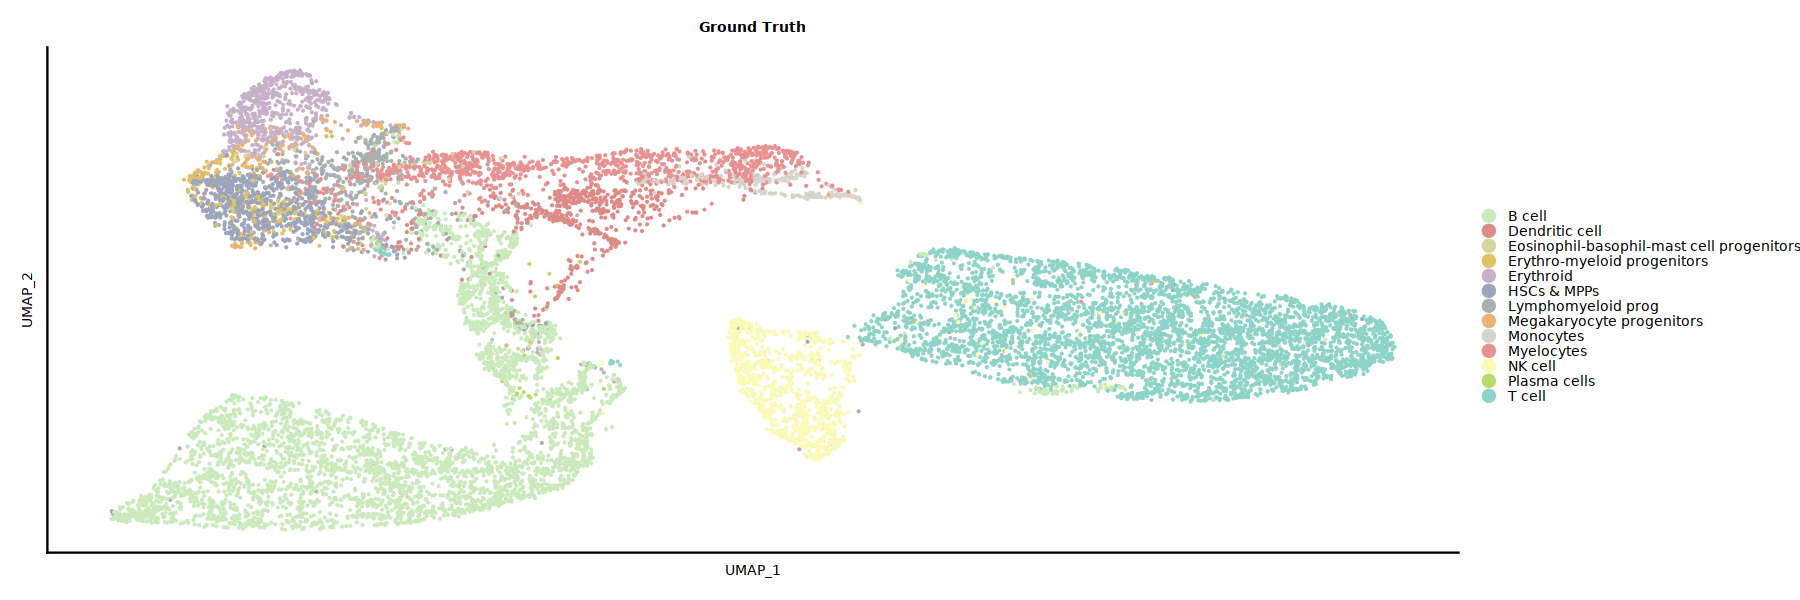

In [7]:
options(repr.plot.width=15, repr.plot.height=5)
plot_celltypes = plot_umap(umap, c("class_"),NULL, colors,1,1, legend_ncol = 1,
                           title="Ground Truth")
f6a <- plot_celltypes[[1]]
f6a



Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


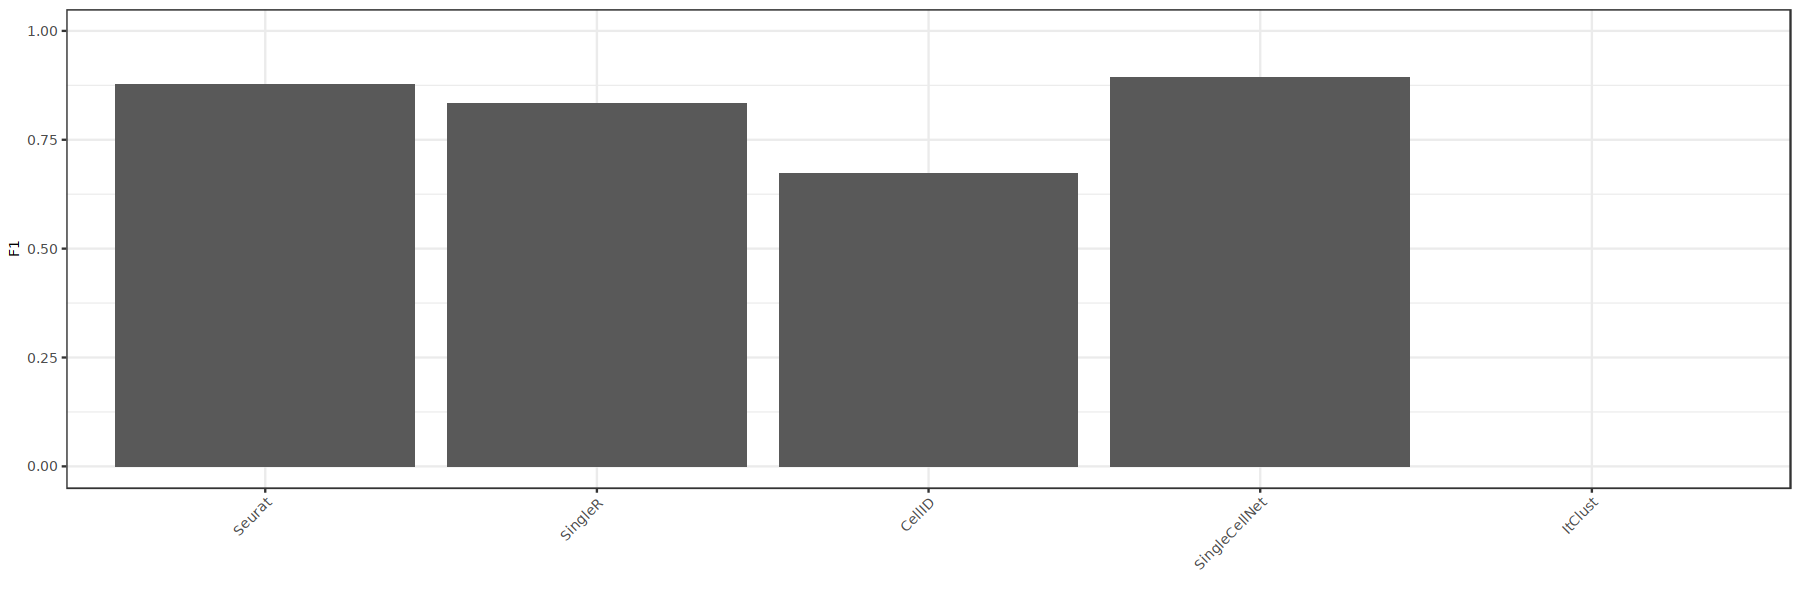

In [8]:

measures$obs <- sizes[ match(measures$class, celltypes ) ]

f1 <-  measures %>% dplyr::group_by( method) %>% 
           dplyr::summarize(f1 = sum(f1 * obs) / sum(obs) , precision = sum(precision*obs)/ sum(obs), accuracy = sum(accuracy*obs)/ sum(obs))



f1$method <- factor(f1$method, levels=methods)

f7b <- ggplot(f1, aes(method, f1)) + geom_bar(stat="identity")                                                                     
f7b <- addFormatting(f7b, "F1", "", legend="none", xtext="angle")

f7b

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


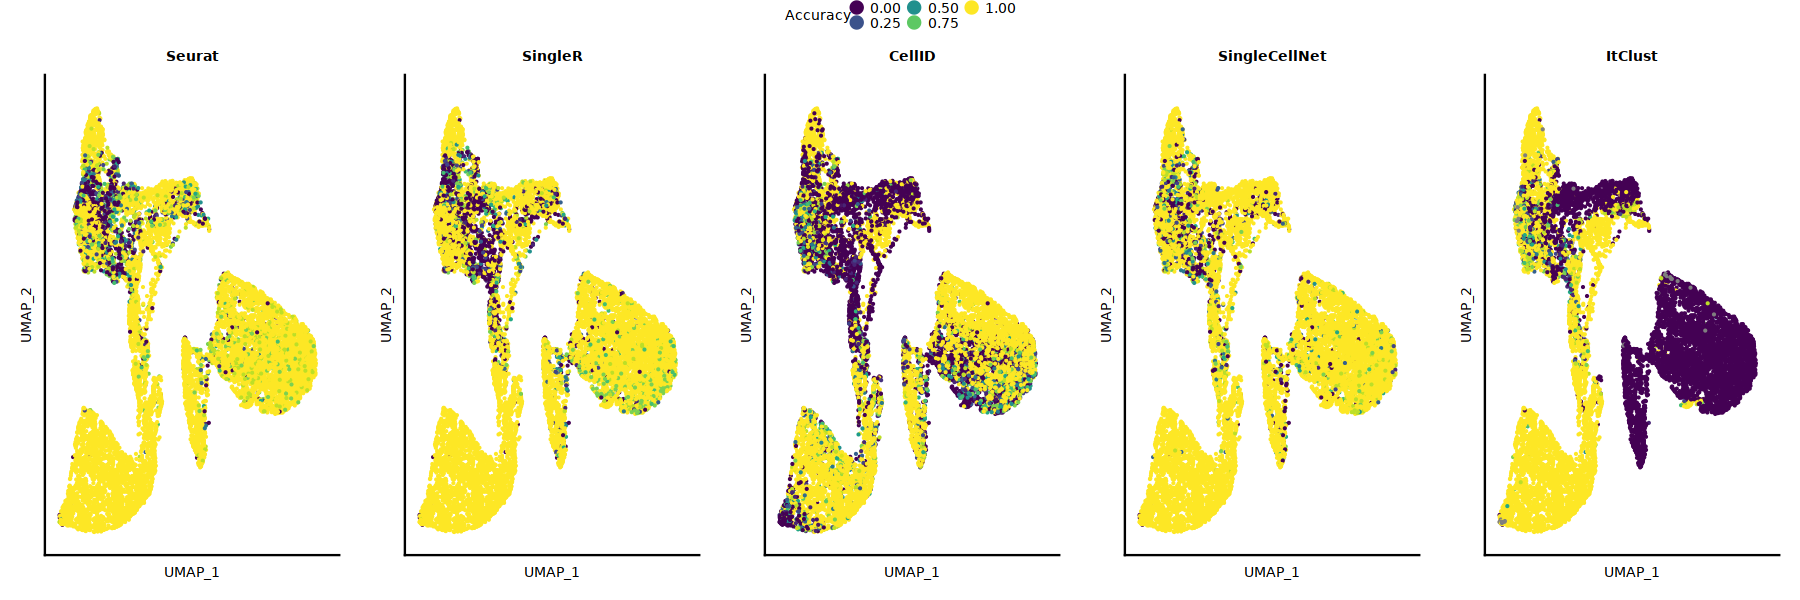

In [9]:
plots <- plot_features(umap,methods, NULL, 1,1, legend_ncol = 3) 
names(plots) <- methods
plots <- lapply(seq(1,length(methods),1) , function(n) plots[[n]]+ labs(title= methods[n]))                
f6b <- ggpubr::ggarrange(plotlist = plots, font.label = list(size = 10), 
                         common.legend = T, legend = "top", ncol=5, nrow=1)
f6b


In [13]:
bootstrap_weighted <- read.csv("../Results/Files/summary_BoneMarrow14707.csv")
bootstrap_weighted <- bootstrap_weighted[!is.na(bootstrap_weighted$reference.x),]

head(bootstrap_weighted)

bootstrap_weighted$precision[is.na(bootstrap_weighted$precision)] <- 0
bootstrap_weighted$full_precision[is.na(bootstrap_weighted$full_precision)] <- 0
nrow(bootstrap_weighted)
bootstrap_weighted <- bootstrap_weighted[!is.na(bootstrap_weighted$accuracy),]

plot_accuracy  <- get_violin_plot(bootstrap_weighted, colors, celltypes, methods,
                                 "", "Accuracy", colors)
plot_precision <- get_violin_plot(bootstrap_weighted, colors, celltypes, methods,
                                  "", "Precision", colors)
plot_f1        <- get_violin_plot(bootstrap_weighted, colors, celltypes, methods,
                                  "", "F1", colors)+theme(legend.position = "none")

plot_accuracy
plot_precision
plot_f1 

class,method,reference.x,set,precision,recall,f1,accuracy,reference.y,full_precision,full_recall,full_f1,full_accuracy
<chr>,<chr>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>


[1] 0

ERROR while rich displaying an object: Error in `combine_vars()`:
! Faceting variables must have at least one value

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. pas

In [11]:
options(repr.plot.width=15, repr.plot.height=15)
f6ab <- ggpubr::ggarrange(f6a, f7b,   nrow=1, ncol=2, labels= c("A", "B"), widths = c(2,1))
f6 <- ggpubr::ggarrange(f6ab, f6b, plot_f1,  nrow=3, ncol=1, labels= c("", "C", "D"))
f6

Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


ERROR: [1m[33mError[39m in `purrr::map()`:[22m
[1m[22m[36mℹ[39m In index: 1.
[1mCaused by error in `combine_vars()`:[22m
[1m[22m[33m![39m Faceting variables must have at least one value


In [ ]:
ggsave(
  "../Results/Figures/F7_bonemarrow.jpg",
  plot = f6,
  device = "jpg",
  path = NULL,
  scale = 1,
  width = 180,
  height = 160,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = "white"
)

ggsave(
  "../Results/Figures/S7_bonemarrow.jpg",
  plot = s3,
  device = "jpg",
  path = NULL,
  scale = 1,
  width = 180,
  height = 200,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = "white"
)